In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import bettermoments as bm
from astropy.wcs import WCS

In [3]:
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 14})

In [4]:
bunit_add = fits.open("inc_23warp_21_wpa179.5_hanning.fits", mode="update")
bunit_add["PRIMARY"].header["BUNIT"] = 'Jy'
bunit_add.flush()
bunit_add.close()

In [5]:
path = 'inc_23warp_21_wpa179.5_hanning.fits'
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [6]:
path = 'inc_23.0warp_21.0_wpa179.5.fits'
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [7]:
inc23nowarpm0 = fits.open('inc_23.0warp_0.0_wpa0.0_M0.fits')
inc23nowarpm0_data = inc23nowarpm0["PRIMARY"].data

inc23warpm0 = fits.open('inc_23.0warp_5.25_wpa179.5_M0.fits')
inc23warpm0_data = inc23warpm0["PRIMARY"].data

In [8]:
warpext = fits.open('inc_23.0warp_21.0_wpa179.5_M0.fits')
warpext_data = warpext["PRIMARY"].data

In [9]:
512*0.05

25.6

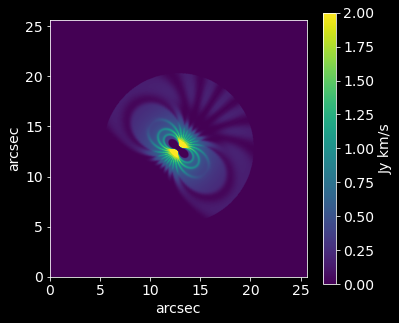

In [10]:
fig, ax = plt.subplots()
plt.imshow(inc23nowarpm0_data, vmin=0, vmax=2, extent=[0,25.6,0,25.6])
plt.colorbar(label="Jy km/s")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
fig.set_size_inches(5.75, 5)
plt.savefig("m0nowarp.png")
#plt.xlabel()

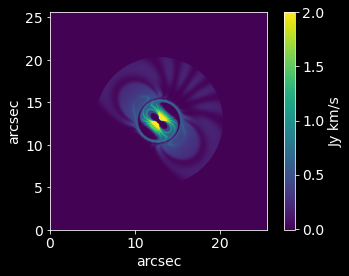

In [11]:
fig, ax = plt.subplots()
plt.imshow(inc23warpm0_data, vmin=-.01, vmax=2, extent=[0,25.6,0,25.6])
plt.colorbar(label="Jy km/s")
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
plt.savefig("m0warp.png")
#plt.xlabel()

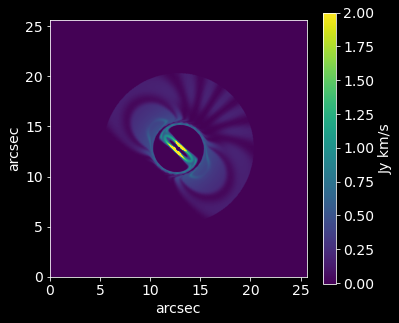

In [12]:
fig, ax = plt.subplots()
plt.imshow(warpext_data, vmin=-.01, vmax=2, extent=[0,25.6,0,25.6])
plt.colorbar(label="Jy km/s")
fig.set_size_inches(5.75, 5)
ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
plt.savefig("m0warp.png")
#plt.xlabel()

In [13]:
path = '12CO_LSRK_cleanimage.fits'
data, velax = bm.load_cube(path)
rms = bm.estimate_RMS(data=data, N=1)
m0 = bm.collapse_zeroth(velax=velax, data=data, rms=rms)
bm.save_to_FITS(moments=m0, method='zeroth', path=path)

In [14]:
datam0 = fits.open('12CO_LSRK_cleanimage_M0.fits')
datam0_data = datam0[0].data
datam0_header = datam0[0].header

In [15]:
wcs_ceti = WCS(datam0_header)

In [16]:
wcs_ceti

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 23.65808076667  -15.676379615  
CRPIX : 513.0  513.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -4.444444444444e-06  4.444444444444e-06  
NAXIS : 1024  1024

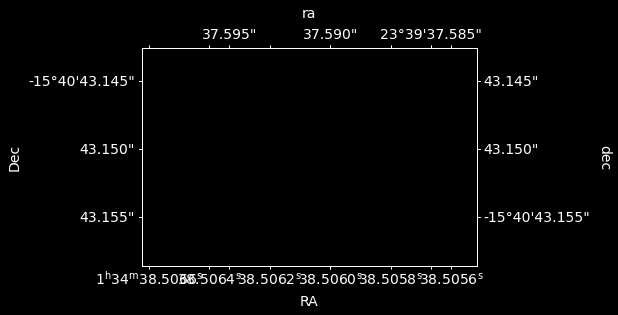

In [17]:
fig, ax = plt.subplots()
plt.imshow(datam0_data, origin="lower", cmap="cividis", aspect="equal")
#plt.imshow( , vmin=0, vmax=170)
ax = plt.subplot(projection=wcs_ceti)
overlay = ax.get_coords_overlay("icrs")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
#plt.colorbar(label="Jy m/s")
#fig.set_size_inches(5.75, 5)
#ax.set_ylim(300,700)
#ax.set_xlim(300,700)
#ax.set_xlabel("arcsec")
#ax.set_ylabel("arcsec")
#plt.savefig("m0warp.png")

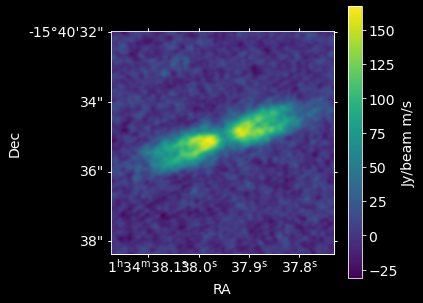

In [18]:
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs_ceti))
plt.imshow(datam0_data, origin='lower')
ax.set_ylim(300,700)
ax.set_xlim(300,700)
plt.colorbar(label='Jy/beam m/s')
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
fig.set_size_inches(5, 5)

In [19]:
.16*800

128.0

In [20]:
datam0_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
BMAJ    = 6.74637738201353E-05                                                  
BMIN    = 6.02541863918304E-05                                                  
BPA     =    88.17740631103516                                                  
BUNIT   = 'Jy/beam m/s'                                                         
CTYPE1  = 'RA---SIN'                                                            
CRVAL1  =       23.65808076667                                                  
CDELT1  =  -4.444444444444E-06                                                  
CRPIX1  =                513

In [21]:
resid_m0 = fits.open('resid_m0_nosigma.fits')
resid_m0_data = resid_m0[0].data
resid_m0_header = resid_m0[0].header

In [22]:
wcs_resid = WCS(resid_m0_header)

In [23]:
wcs_resid

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'VRAD'  'STOKES'  
CRVAL : 23.65779056704  -15.67637259295  -4070.800096788  1.0  
CRPIX : 36.0  36.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -2.777777948778e-05  2.777777948778e-05  264.5953325818  1.0  
NAXIS : 70  70  1  1

In [28]:
resid_m0_header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                   70                                                  
NAXIS2  =                   70                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   1.675649722318E-04                                                  
BMIN    =   1.154586725963E-04                                                  
BPA     =   8.903882598877E+

In [58]:
# Plot beam
import math
xoff=3
yoff=3
t=np.arange(0.0,2.0*np.pi,0.05)
x=resid_m0_header['bmaj']*1800.0*np.cos(t)*np.cos((resid_m0_header['bpa']+90.0)*math.pi/180.0)-1800.0*resid_m0_header['bmin']*np.sin(t)*np.sin((resid_m0_header['bpa']+90.0)*math.pi/180.0)+xoff
y=1800.0*resid_m0_header['bmaj']*np.cos(t)*np.sin((resid_m0_header['bpa']+90.0)*math.pi/180.0)+1800.0*resid_m0_header['bmin']*np.sin(t)*np.cos((resid_m0_header['bpa']+90.0)*math.pi/180.0)+yoff

In [56]:
1/3600

0.0002777777777777778

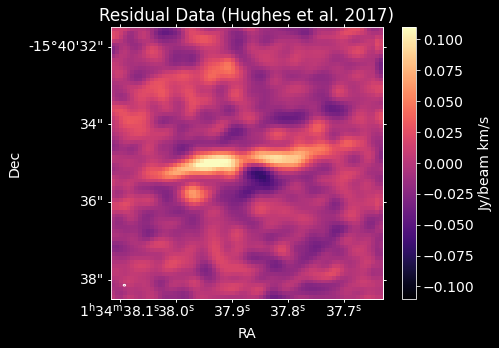

In [59]:
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs_resid[0,0,:,:]))
plt.imshow(resid_m0_data[0,0,:,:], origin='lower', cmap="magma", vmin=-0.11, vmax=0.11)
plt.colorbar(label='Jy/beam km/s')
plt.title("Residual Data (Hughes et al. 2017)")
plt.xlabel(r"RA")
plt.ylabel(r"Dec")
plt.fill(x,y,fill=False,hatch='//////')
fig.set_size_inches(7, 5)

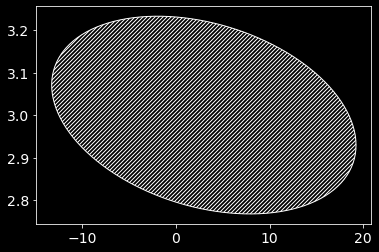

In [53]:
plt.fill(x,y,fill=False,hatch='//////')

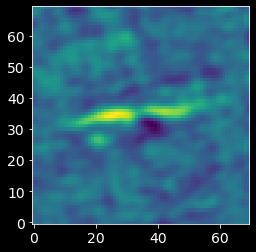

In [25]:
plt.imshow(resid_m0_data[0,0,:,:], origin='lower')

In [26]:
wcs_resid.shape

AttributeError: 'WCS' object has no attribute 'shape'